<a href="https://colab.research.google.com/github/gokull-lakshmanan/Projects/blob/main/Aerofit%20Descriptive%20Statistics%20%26%20Customer%20Segmentation/notebooks/Aerofit_Descriptive_Statistics_and_Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm,poisson,geom,expon

**Question:**

**The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.**

**Product Portfolio:**

**The KP281 is an entry-level treadmill that sells for $1,500.**

**The KP481 is for mid-level runners that sell for $1,750.**

**The KP781 treadmill is having advanced features that sell for $2,500.**

In [ ]:
data = pd.read_csv('aerofit_treadmill.csv')

**Basic Analysis**

In [ ]:
data.sample(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
137,KP481,40,Male,16,Partnered,3,3,64809,95
60,KP281,33,Female,16,Partnered,3,3,46617,85
114,KP481,30,Female,13,Single,4,3,46617,106
85,KP481,21,Male,16,Partnered,2,2,34110,42
59,KP281,33,Female,16,Single,2,2,55713,38


In [ ]:
data.shape

(180, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
data['Product'].value_counts()

,count
Product,
KP281,80
KP481,60
KP781,40


**Checking for null values.**

In [ ]:
data.isnull().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


**Basic Probability and Statistics Analysis**

In [ ]:
data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


**Total number of males and females**

In [ ]:
data['Gender'].value_counts()

,count
Gender,
Male,104
Female,76


**Total number of parented and singles.**

In [ ]:
data['MaritalStatus'].value_counts()

,count
MaritalStatus,
Partnered,107
Single,73


**Filtering Data by Product Codes (KP281, KP481, KP781)**

In [ ]:
kp281 = data.loc[data['Product']=='KP281']
kp481 = data.loc[data['Product']=='KP481']
kp781 = data.loc[data['Product']=='KP781']

**Checking for Outliers**

<Axes: ylabel='Age'>

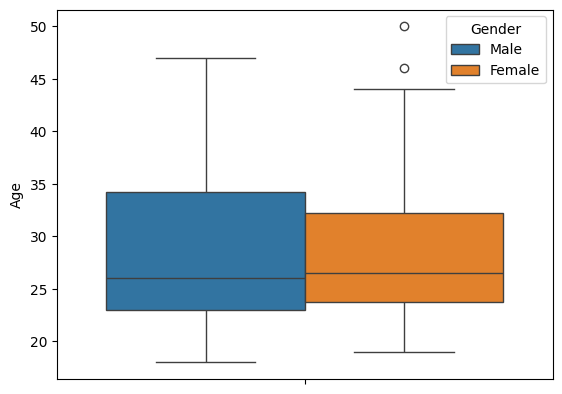

In [ ]:
sns.boxplot(data=kp281,y='Age',hue = 'Gender')

<Axes: ylabel='Age'>

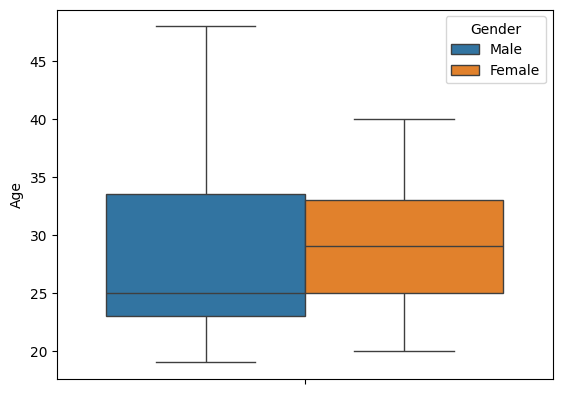

In [ ]:
sns.boxplot(data=kp481,y='Age',hue = 'Gender')

<Axes: ylabel='Age'>

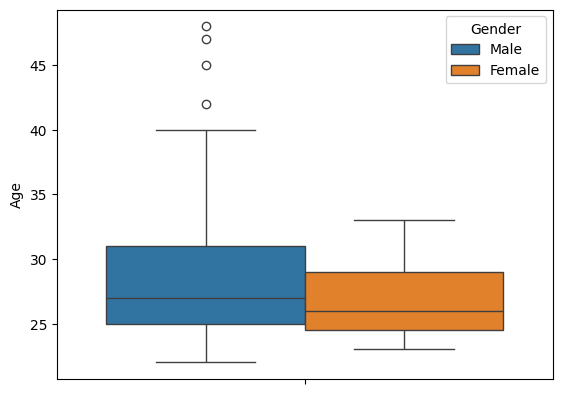

In [ ]:
sns.boxplot(data=kp781,y='Age',hue = 'Gender')

In [ ]:
q1_281 = kp281['Age'].quantile(0.25)
q3_281 = kp281['Age'].quantile(0.75)
iqr_281 = q3_281 - q1_281
lower_281 = q1_281 - 1.5*iqr_281
upper_281 = q3_281 + 1.5*iqr_281
lower_281,upper_281

(8.0, 48.0)

In [ ]:
q1_481 = kp481['Age'].quantile(0.25)
q3_481 = kp481['Age'].quantile(0.75)
iqr_481 = q3_481 - q1_481
lower_481 = q1_481 - 1.5*iqr_481
upper_481 = q3_481 + 1.5*iqr_481
lower_481,upper_481

(10.125, 47.125)

In [ ]:
q1_781 = kp781['Age'].quantile(0.25)
q3_781 = kp781['Age'].quantile(0.75)
iqr_781 = q3_781 - q1_781
lower_781 = q1_781 - 1.5*iqr_781
upper_781 = q3_281 + 1.5*iqr_781
lower_781,upper_781

(16.5, 41.25)

<Axes: ylabel='Income'>

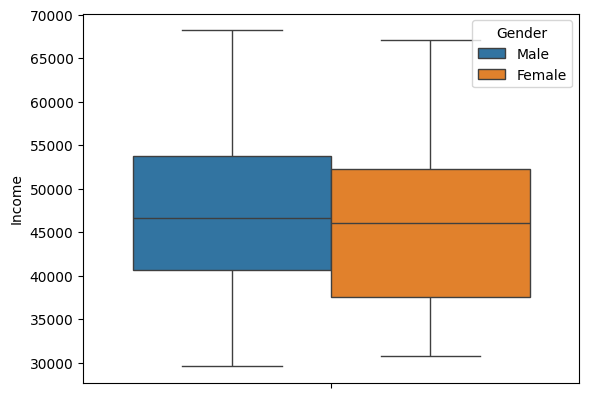

In [ ]:
sns.boxplot(data=kp281,y='Income',hue = 'Gender')

<Axes: ylabel='Income'>

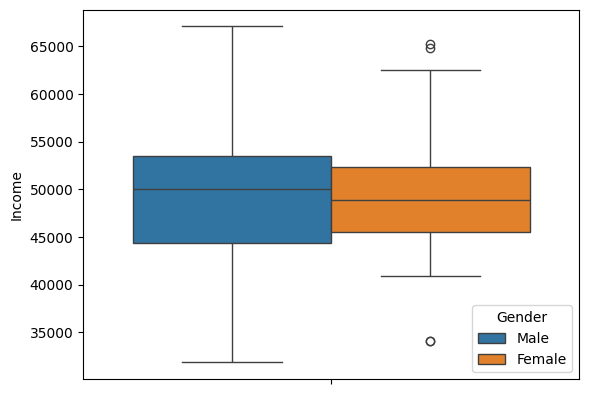

In [ ]:
sns.boxplot(data=kp481,y='Income',hue = 'Gender')

<Axes: ylabel='Income'>

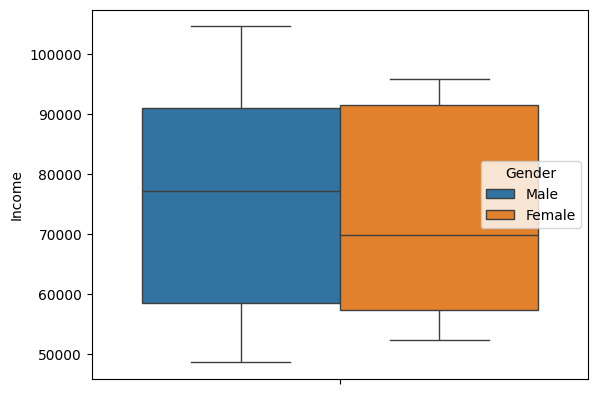

In [ ]:
sns.boxplot(data=kp781,y='Income',hue = 'Gender')

In [ ]:
q1_281_income = kp281['Income'].quantile(0.25)
q3_281_income = kp281['Income'].quantile(0.75)
iqr_281_income = q3_281_income - q1_281_income
lower_281_income = q1_281_income - 1.5*iqr_281_income
upper_281_income = q3_281_income + 1.5*iqr_281_income
lower_281_income,upper_281_income

(16486.5, 75610.5)

In [ ]:
q1_481_income = kp481['Income'].quantile(0.25)
q3_481_income = kp481['Income'].quantile(0.75)
iqr_481_income = q3_481_income - q1_481_income
lower_481_income = q1_481_income - 1.5*iqr_481_income
upper_481_income = q3_481_income + 1.5*iqr_481_income
lower_481_income,upper_481_income

(32120.25, 66230.25)

In [ ]:
q1_781_income = kp781['Income'].quantile(0.25)
q3_781_income = kp781['Income'].quantile(0.75)
iqr_781_income = q3_781_income - q1_781_income
lower_781_income = q1_781_income - 1.5*iqr_781_income
upper_781_income = q3_781_income + 1.5*iqr_781_income
lower_781_income,upper_781_income

(9182.875, 139907.875)

<Axes: xlabel='Income', ylabel='Density'>

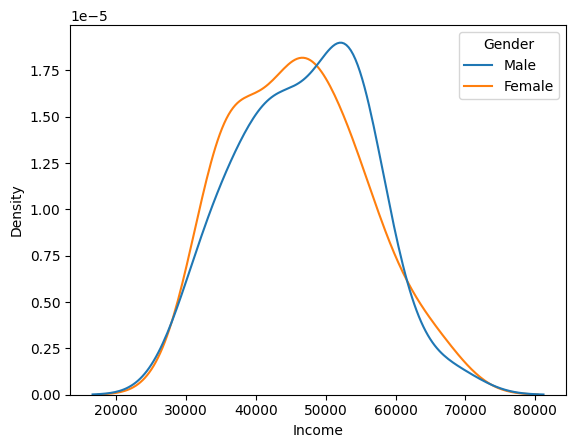

In [ ]:
sns.kdeplot(data=kp281,x='Income',hue='Gender')

<Axes: xlabel='Income', ylabel='Density'>

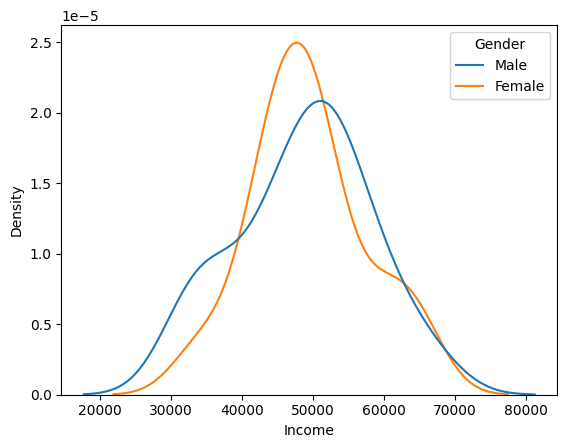

In [ ]:
sns.kdeplot(data=kp481,x='Income',hue='Gender')

<Axes: xlabel='Income', ylabel='Density'>

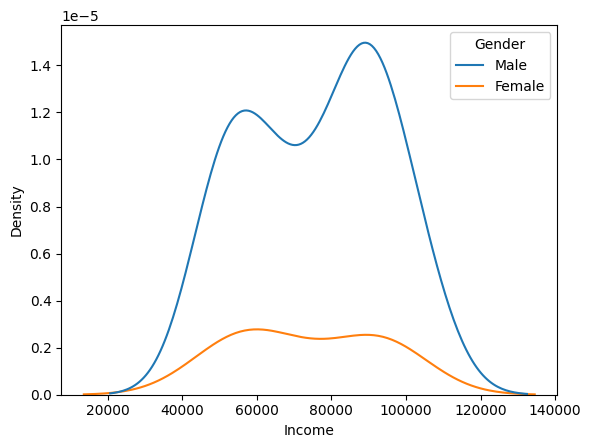

In [ ]:
sns.kdeplot(data=kp781,x='Income',hue='Gender')

**Total Number of Males and Females in Each Product**





In [ ]:
data.groupby('Product',as_index = False)['Gender'].value_counts()

,Product,Gender,count
0,KP281,Female,40
1,KP281,Male,40
2,KP481,Male,31
3,KP481,Female,29
4,KP781,Male,33
5,KP781,Female,7


**Total Number of Single and Parented in Each Product**

In [ ]:
data.groupby('Product',as_index = False)['MaritalStatus'].value_counts()

,Product,MaritalStatus,count
0,KP281,Partnered,48
1,KP281,Single,32
2,KP481,Partnered,36
3,KP481,Single,24
4,KP781,Partnered,23
5,KP781,Single,17


In [ ]:
pd.crosstab(data['Product'], data['Gender'],normalize= True,margins = True)

Gender,Female,Male,All
Product,,,
KP281,0.222222,0.222222,0.444444
KP481,0.161111,0.172222,0.333333
KP781,0.038889,0.183333,0.222222
All,0.422222,0.577778,1.000000


In [ ]:
pd.crosstab(data['Product'], data['MaritalStatus'],normalize= True,margins = True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,0.266667,0.177778,0.444444
KP481,0.200000,0.133333,0.333333
KP781,0.127778,0.094444,0.222222
All,0.594444,0.405556,1.000000


In [ ]:
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
data[['Age','Education','Usage','Fitness','Income','Miles']].corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


<Axes: >

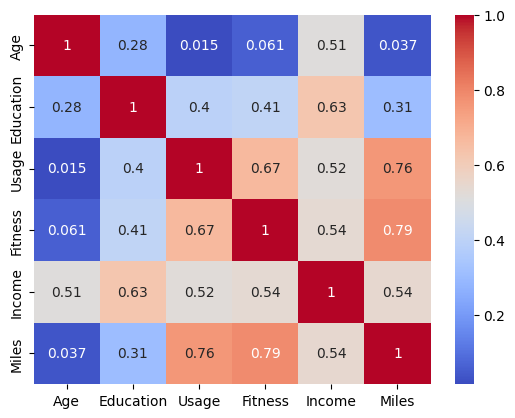

In [ ]:
sns.heatmap(data[['Age','Education','Usage','Fitness','Income','Miles']].corr(),annot=True, cmap='coolwarm')

In [ ]:
kp281.groupby('Gender',as_index = False)['Fitness'].value_counts()

,Gender,Fitness,count
0,Female,3,26
1,Female,2,10
2,Female,4,3
3,Female,5,1
4,Male,3,28
5,Male,4,6
6,Male,2,4
7,Male,1,1
8,Male,5,1


In [ ]:
kp481.groupby('Gender',as_index = False)['Fitness'].value_counts()

,Gender,Fitness,count
0,Female,3,18
1,Female,2,6
2,Female,4,4
3,Female,1,1
4,Male,3,21
5,Male,2,6
6,Male,4,4


In [ ]:
kp781.groupby('Gender',as_index = False)['Fitness'].value_counts()

,Gender,Fitness,count
0,Female,5,5
1,Female,3,1
2,Female,4,1
3,Male,5,24
4,Male,4,6
5,Male,3,3


<Axes: xlabel='Miles', ylabel='Density'>

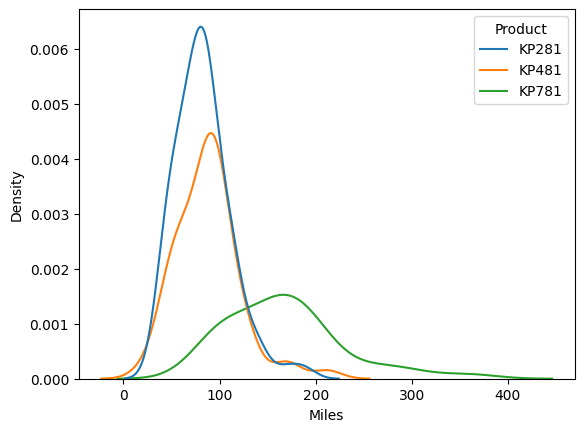

In [ ]:
sns.kdeplot(data,x = 'Miles', hue = 'Product')

**Count of people across age intervals.**

<Axes: xlabel='Age', ylabel='Count'>

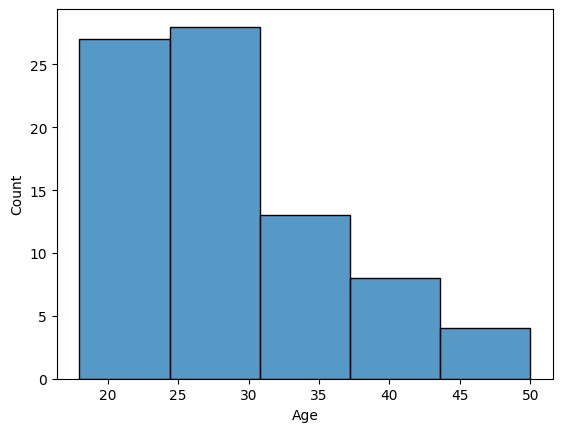

In [ ]:
sns.histplot(kp281['Age'],bins = 5)

<Axes: xlabel='Age', ylabel='Count'>

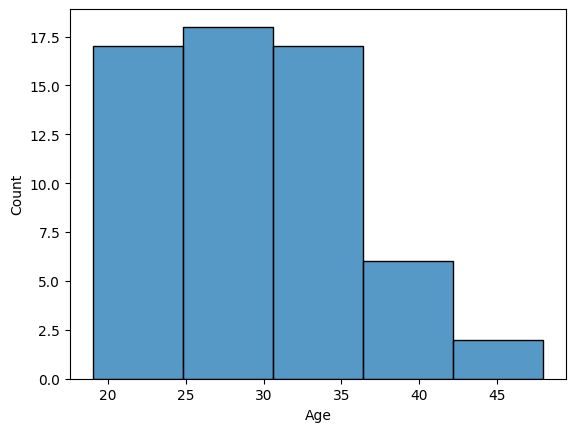

In [ ]:
sns.histplot(kp481['Age'],bins = 5)

<Axes: xlabel='Age', ylabel='Count'>

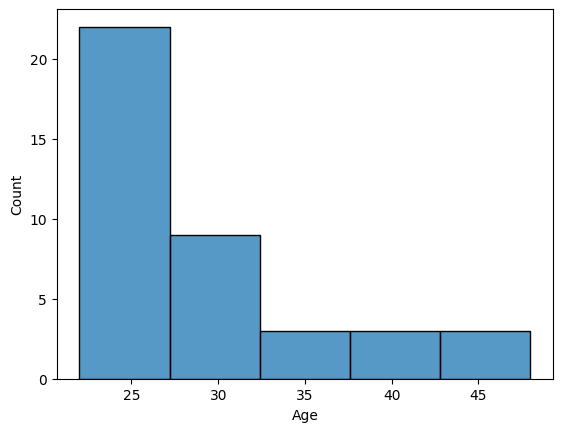

In [ ]:
sns.histplot(kp781['Age'],bins = 5)

Count of people across income intervals.

<Axes: xlabel='Income', ylabel='Count'>

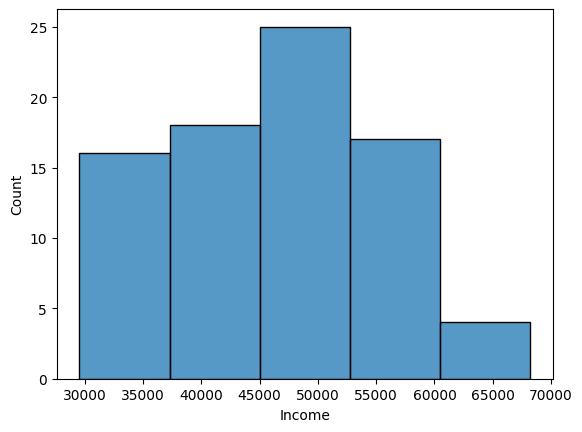

In [ ]:
sns.histplot(kp281['Income'],bins = 5)

<Axes: xlabel='Income', ylabel='Count'>

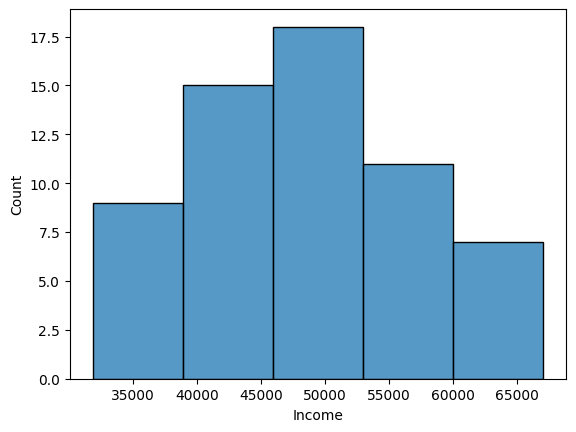

In [ ]:
sns.histplot(kp481['Income'],bins = 5)

<Axes: xlabel='Income', ylabel='Count'>

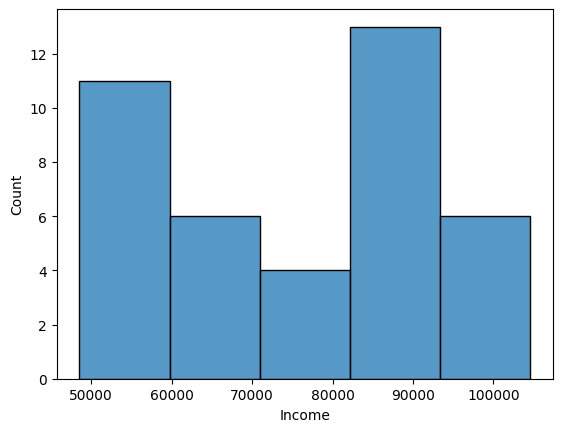

In [ ]:
sns.histplot(kp781['Income'],bins = 5)

**Count of people at each education level for each product.**

In [ ]:
data.groupby('Product',as_index = False)['Education'].value_counts()

,Product,Education,count
0,KP281,16,39
1,KP281,14,30
2,KP281,15,4
3,KP281,13,3
4,KP281,12,2
5,KP281,18,2
6,KP481,16,31
7,KP481,14,23
8,KP481,13,2
9,KP481,18,2


<Axes: xlabel='Product', ylabel='count'>

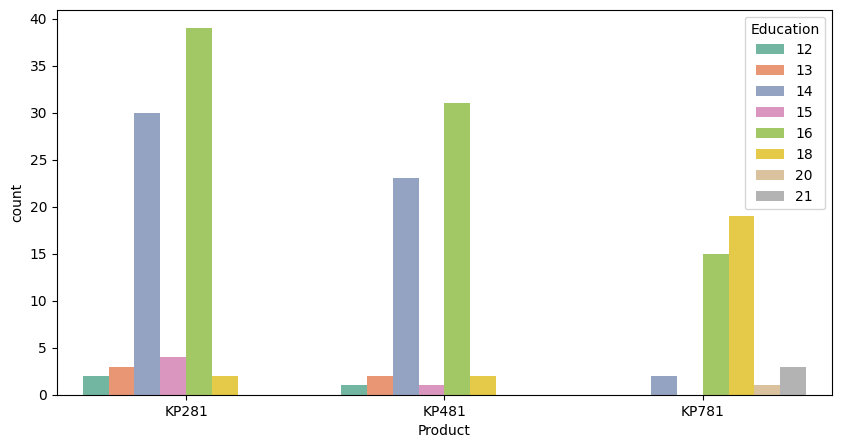

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data = data, x = 'Product', hue = 'Education',palette='Set2')

**Product Recommendations Based on Customer Data**

**Total Customers:** 180  
- **KP281:** 80 customers (44%)  
- **KP481:** 60 customers (33%)  
- **KP781:** 40 customers (22%)  

---

### **KP281 Insights**  
- **Age:**  
  - 50% of buyers are aged between **8** and **48**.  
  - Majority are between **20** and **30**.  
- **Income:**  
  - 50% fall within **16,400 – 75,000**.  
  - Most buyers earn between **45,000** and **55,000**.  
- **Gender:**  
  - **40** males and **40** females.  
- **Marital Status:**  
  - **48** parented and **32** single.  
- **Education:**  
  - **39** buyers have **16** years of education.  
  - **30** buyers have **14** years of education.  
- **Fitness Level:**  
  - **26** out of **40** females rated their fitness as **3**.  
  - **28** out of **40** males rated their fitness as **3**.  

**Recommendation for KP281:**  
Suggest KP281 to customers who:  
- Rate their fitness as **3**.  
- Earn between **45,000 – 55,000**.  
- Have **14** or **16** years of education.  
- Are **parented**.  
- Are aged between **20 – 30**.  

---

### **KP481 Insights**  
- **Age:**  
  - 50% of buyers are aged between **10** and **47**.  
  - Most fall between **20 – 35**.  
- **Income:**  
  - 50% earn between **32,000 – 66,000**.  
  - Majority earn between **45,000 – 55,000**.  
- **Gender:**  
  - **31** males and **29** females.  
- **Marital Status:**  
  - **36** parented and **24** single.  
- **Education:**  
  - **31** buyers have **16** years of education.  
  - **29** buyers have **14** years of education.  
- **Fitness Level:**  
  - **18** out of **29** females rated their fitness as **3**.  
  - **21** out of **31** males rated their fitness as **3**.  

**Recommendation for KP481:**  
Suggest KP481 to customers who:  
- Rate their fitness as **3**.  
- Earn between **45,000 – 55,000**.  
- Have **14** or **16** years of education.  
- Are **parented**.  
- Are aged between **20 – 35**.  

> **Note:** Both KP281 and KP481 appeal to similar profiles, but older customers tend to prefer **KP281**, while younger ones lean towards **KP481**.

---

### **KP781 Insights**  
- **Age:**  
  - 50% of buyers are aged between **16 – 41**.  
  - Most are between **22 – 27**.  
- **Income:**  
  - 50% earn between **9,000 – 130,000**.  
  - Majority earn between **80,000 – 95,000**.  
- **Gender:**  
  - **33** males and **7** females.  
- **Marital Status:**  
  - **23** parented and **17** single.  
- **Education:**  
  - **19** buyers have **18** years of education.  
  - **15** buyers have **16** years of education.  
- **Fitness Level:**  
  - **5** out of **7** females rated their fitness as **5**.  
  - **24** out of **33** males rated their fitness as **5**.  

**Recommendation for KP781:**  
Suggest KP781 to customers who:  
- Rate their fitness as **5**.  
- Are aged between **22 – 27**.  
- Earn between **80,000 – 95,000**.  
- Have **18** years of education.  